# Part 1) Load the data and make a datetime index.

You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
 -  Keep only data from the year 2000 or later.
 - Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth
4. Impute any missing values.
 - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

### Imports

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

### Load the Data

In [2]:
# Load data
weather = pd.read_csv('Data/london_weather_MODIFIED.csv')
weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 1. Convert the date column to datetime dtype.

In [3]:
weather['date'] = pd.to_datetime(weather['date'], format='%Y%m%d')
# Confirm results
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  datetime64[ns]
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 1.2 MB


## 2. Set the date column as the index.

In [4]:
# Set 'date' as index
weather = weather.set_index('date')
weather.head(3)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


## 3. Filter out only the required data:

- ### Keep only data from the year 2000 or later.

In [5]:
# Check index
weather.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [6]:
# Keep years 2000 and later
weather = weather.loc['2000':]
weather.head(3)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0


- ### Keep only the following features:
 - precipitation
 - mean_temp
 - min_temp
 - max_temp
 - snow_depth

In [7]:
# Keep only necessary features
weather = weather.drop(columns = ['cloud_cover', 'sunshine',
                                 'global_radiation', 'pressure'])
weather.head(3)

,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0


### 4. Impute any missing values.

In [8]:
# Check any missing values
weather.isna().sum()

max_temp          390
mean_temp         419
min_temp          386
precipitation     390
snow_depth       1752
dtype: int64

In [9]:
# Interpolate temp measurements
weather['mean_temp'] = weather['mean_temp'].interpolate()
weather['max_temp'] = weather['max_temp'].interpolate()
weather['min_temp'] = weather['min_temp'].interpolate()

In [10]:
# Confirm results
weather.isna().sum()

max_temp            0
mean_temp           0
min_temp            0
precipitation     390
snow_depth       1752
dtype: int64

In [11]:
# Fill precipication and snow with 0
weather['precipitation'] = weather['precipitation'].fillna(0)
weather['snow_depth'] = weather['snow_depth'].fillna(0)

In [12]:
weather.isna().sum()

max_temp         0
mean_temp        0
min_temp         0
precipitation    0
snow_depth       0
dtype: int64

### Final check 

In [13]:
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   max_temp       7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   precipitation  7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,max_temp,mean_temp,min_temp,precipitation,snow_depth
date,,,,,
2000-01-01,10.8,7.0,4.9,0.0,0.0
2000-01-02,11.5,7.9,5.0,0.2,0.0
2000-01-03,9.5,9.4,7.2,6.0,0.0
2000-01-04,11.0,7.0,4.4,0.2,0.0
2000-01-05,10.8,6.4,1.9,0.8,0.0


# Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
 - If there is a specific time period, plot only that time period.
 
Note: you may want to make a temporary DataFrame that you will use to answer this question only.

## Q1: What month had the most precipitation between 2000 through 2010?
- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
 - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
 - Make sure to add a legend so that your label is visible.

In [14]:
# Make temporary datadframe for question 1
precip = weather['precipitation'].copy()
precip.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

### Resample the data as Monthly frequency

In [40]:
# Resample 'precipication' feature as monthly freqeuncy
precip_MS = precip.resample("MS").count()
precip_MS.name = 'Resampled'
precip_MS.head()

date
2000-01-01    31
2000-02-01    29
2000-03-01    31
2000-04-01    30
2000-05-01    31
Freq: MS, Name: Resampled, dtype: int64

### Find the date and corresponding value for the max precipitation

In [38]:
# Find date
max_date = precip_MS.idxmax()
max_date

Timestamp('2014-01-01 00:00:00', freq='MS')

In [39]:
# Find the corresponding value
max_date_precip = precip.loc[max_date]
max_date_precip

0.0

## Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
 - Create a wide figure (e.g. figsize=(12,3))
  - With the title "Precipitation for 2000-2010"
  - With a ylabel of "Inches"
- Customize the major xaxis ticks to:
 - Have major xaxis ticks every 1 year.
 - Use 4-digit years for the labels
 - Rotate the major ticks' labels 90 degrees.
- Customize the minor xaxis ticks to:
 - Have minor xaxis ticks every 3 months
 - Do not label the minor ticks.

In [22]:
# Define plot
precip_plot = precip.loc['2000':'2010']
precip_plot

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
             ... 
2010-12-27    5.0
2010-12-28    0.4
2010-12-29    1.4
2010-12-30    0.0
2010-12-31    0.0
Name: precipitation, Length: 4018, dtype: float64

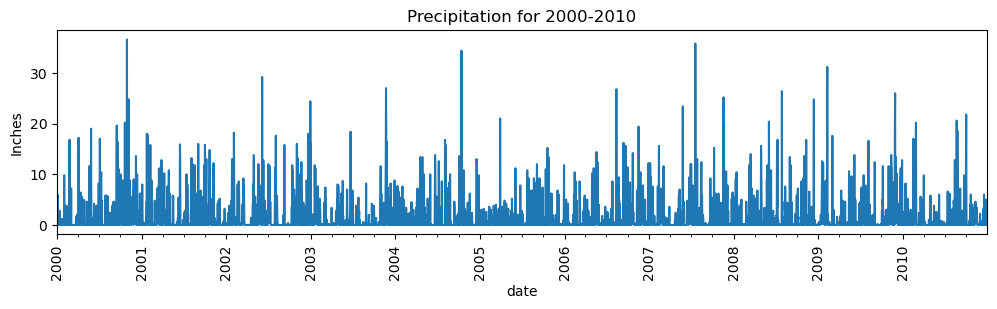

In [24]:
# Plot the data
ax = precip_plot.plot(figsize=(12,3))
ax.set(title = 'Precipitation for 2000-2010', ylabel='Inches')

# Customize major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# Customize minor ticks
minor_loc = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(minor_loc)
# Final adjustments
fig = ax.get_figure()
fig.autofmt_xdate(which='major', rotation=90, ha='center')